In [1]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import math as math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
import random

#Graph Settings
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] =15
plt.rcParams["figure.figsize"] = fig_size

name=["SKMS", "SKP","SLY4","SV-MIN","UNEDF0","UNEDF1",]


# Getting Experimental Binding Energies

In [2]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20


exp_energies = np.loadtxt('EXPERIMENT_AME2016-Copy1.dat',usecols=(3,4,5))
exp_energies=np.transpose(exp_energies)
exp_energies[2]=-exp_energies[2]
exp_energies=np.transpose(exp_energies)


exp_energies_d={}

for i in exp_energies:
    exp_energies_d[i[0],i[1]]=i

#EXP ENERGIES: N, Z, EXP E
#the_energies: N,Z,T_BE,Q,S_n,S_p

print(np.shape(exp_energies))
print("0: ", exp_energies[0])

(3433, 3)
0:  [1.       1.       2.224552]


# Theoretical

In [3]:
#theoretical importing relevent data
#Symbolm Z  N A Binding_Energy_(MeV)  S_p_(MeV)  S_{2p}_(MeV) S_n_(MeV)  S_{2n}_(MeV) Q_{alpha}_(MeV)       
#0      1  2 3 4                     5          6            7          8            9

the_energies= [[],[], [], [], [], [],]

the_names   =['SKMS_all_nuclei-new-Copy1.dat',
              'SKP_all_nuclei-Copy1.dat',
              'SLY4_all_nuclei-new-Copy1.dat',
              'SV-MIN_all_nuclei-new-Copy1.dat',
              'UNEDF0_all_nuclei-new-Copy1.dat',
              'UNEDF1_all_nuclei-new-Copy1.dat']

#the_energies: N,Z,T_BE,Q,S_n,S_p

the_energies[0] = np.genfromtxt('SKMS_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))   
the_energies[1] = np.genfromtxt('SKP_all_nuclei-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[2] = np.genfromtxt('SLY4_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[3] = np.genfromtxt('SV-MIN_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[4] = np.genfromtxt('UNEDF0_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))
the_energies[5] = np.genfromtxt('UNEDF1_all_nuclei-new-Copy1.dat',usecols=(2,1,4,9,7,5))

  
    



for i in range(0,6):   
    the_energies[i]=np.transpose(the_energies[i])
    the_energies[i][2]=-the_energies[i][2]
    the_energies[i]=np.transpose(the_energies[i])
    #print(len(the_energies[i]))

print(the_energies[0][0])
print(the_energies[1][0])
print(the_energies[2][0])


[ 2.       2.      30.01944      nan      nan      nan]
[ 2.        2.       29.983718       nan       nan       nan]
[ 2.        2.       30.710089       nan       nan       nan]


# Removing NaN values in the theoretical data set

In [4]:
 
the_nonan_energies                       =[[],[],[],[],[],[]]
for i in range(0,6):
    for the_energies_i in the_energies[i]:
        if math.isnan(the_energies_i[0]) or math.isnan(the_energies_i[2]) or math.isnan(the_energies_i[3]) or math.isnan(the_energies_i[4]) or math.isnan(the_energies_i[5]):
           x=1
        else:
            the_nonan_energies[i].append(the_energies_i)
            

the_energies=the_nonan_energies

print(the_energies[0][0])
print(the_energies[1][0])
print(the_energies[2][0])


[ 4.        4.       56.131949  2.187491 15.274275 13.806724]
[ 4.        4.       56.070979  2.212739 15.550024 14.131022]
[ 4.        4.       55.470044  3.540045 16.069022 14.659086]


# Creating Dictionaries

In [5]:

the_energies_d   =[{},{},{},{},{},{},]
for i in range(0,6):
    for the_energies_i in the_energies[i]:
        #print(np.shape(the_range_i))
        the_energies_d[i][the_energies_i[0],the_energies_i[1]]=the_energies_i
        #print(the_range_d[i][the_range_i[0],the_range_i[1]])
        
    

# Finding where the experimental and theoretical overlap

In [6]:
the_exp_mat_energies=[[],[],[],[],[],[]]
the_exp_mat_energies_d=[{},{},{},{},{},{}]


#EXP ENERGIES:          N,||Z,||      || E_BE,||            ||   ||     ||
#the_energies:          N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p
#the_exp_mat_energies:  N,||Z,|| T_BE,|| E_BE,|| difference,|| Q,|| S_n,|| S_p
#the_no_mat_energies:   N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p

for i in range(0,6):
    
    
    for exp_energies_i in exp_energies:  
        try:
            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]]
            
            
            # Neutron, Proton, T_BE, E_BE, difference, Q, S_n, S_p
            
            #N
            a=exp_energies_i[0]
            #Z
            b=exp_energies_i[1]
            #T_BE
            c=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2]
            #E_BE
            d=exp_energies_i[2]
            #difference
            e=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2]-exp_energies_i[2]
            #Q
            f=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][3]
            #S_n
            g=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][4]
            #S_p
            h=the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][5]
            
            
            arr=np.array((a,b,c,d,e,f,g,h))
            the_exp_mat_energies[i].append(arr)
            the_exp_mat_energies_d[i][exp_energies_i[0],exp_energies_i[1]]=arr
            
            """
            the_exp_mat_energies[i].append((exp_energies_i[0],
                                            exp_energies_i[1],
                                            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2],
                                            exp_energies_i[2],
                                            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2]-exp_energies_i[2],
                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][3],
                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][4],
                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][5]))
            
            the_exp_mat_energies_d[i][exp_energies_i[0],exp_energies_i[1]]=(exp_energies_i[0],
                                                                            exp_energies_i[1],
                                                                            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2],
                                                                            exp_energies_i[2],
                                                                            the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][2]-exp_energies_i[2],
                                                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][3],
                                                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][4],
                                                                           the_energies_d[i][exp_energies_i[0],exp_energies_i[1]][5])
            """    
        except KeyError:
            continue
        

the_no_mat_energies  =[[],[],[],[],[],[]]
the_no_mat_energies_d=[{},{},{},{},{},{}]

for i in range(0,6):
    for the_energies_i in the_energies[i]:
        try:
            exp_energies_d[the_energies_i[0],the_energies_i[1]]
            
        except KeyError:
            the_no_mat_energies[i].append(the_energies_i)
            the_no_mat_energies_d[i][the_energies_i[0],the_energies_i[1]]=the_energies_i
            
            continue


            
print(the_no_mat_energies[0][0])
print(the_no_mat_energies[1][0])
print(the_no_mat_energies[2][0], "\n")

print(the_exp_mat_energies[0][0])
print(the_exp_mat_energies[1][0])
print(the_exp_mat_energies[2][0], "\n")


[ 14.         4.        78.088202 -22.359007   2.159728  31.246563]
[ 30.        12.       270.718649 -24.056478   1.898529  28.524722]
[ 32.        13.       291.076464 -25.198603   1.641598  24.793407] 

[ 4.        4.       56.131949 56.499083 -0.367134  2.187491 15.274275
 13.806724]
[ 4.        4.       56.070979 56.499083 -0.428104  2.212739 15.550024
 14.131022]
[ 4.        4.       55.470044 56.499083 -1.029039  3.540045 16.069022
 14.659086] 



# Adding Distances and making references

In [7]:
#out_refs MAKE OUT_REFS 
#in_refs  MAKE IN_REFS

out_refs  =[[],[],[],[],[],[]]
in_refs   =[[],[],[],[],[],[]]

for i in range(0,6):
    for j in range(0,20):
        in_refs[i].append(random.choice(the_exp_mat_energies[i]))
        out_refs[i].append(random.choice(the_no_mat_energies[i]))

#for i in range(0,6):
    #df_in_refs=pd.dataFrame(in_refs[i])
    #df_out_refs=pd.dataFrame(out_refs[i])
    #print()
    


all_in_dist         =[[],[],[],[],[],[]]
all_out_dist        =[[],[],[],[],[],[]]


exp_mat_in_dist     =[[],[],[],[],[],[]]
exp_mat_out_dist    =[[],[],[],[],[],[]]

no_mat_in_dist      =[[],[],[],[],[],[]]
no_mat_out_dist     =[[],[],[],[],[],[]]

for i in range(0,6):
    for j in the_no_mat_energies[i]:
        #print(j[0])
        #print(j[1])
        
        d=[]
        for k in in_refs[i]:
            vert=k[0]-j[0]
            hori=k[5]-j[3]  
            d.append(np.sqrt(vert**2+hori**2))
        
        no_mat_in_dist[i].append(d)
            
            
        
        d=[]    
        for k in out_refs[i]:
            vert=k[0]-j[0]
            hori=k[3]-j[3]  
            d.append(np.sqrt(vert**2+hori**2))
        
        no_mat_out_dist[i].append(d)
      

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    
for i in range(0,6):
    for j in the_exp_mat_energies[i]:
        #print(j[0])
        #print(j[1])
        
        d=[]
        for k in in_refs[i]:
            vert=k[0]-j[0]
            hori=k[5]-j[5]  
            d.append(np.sqrt(vert**2+hori**2))
        
        exp_mat_in_dist[i].append(d)
            
            
        
        d=[]    
        for k in out_refs[i]:
            vert=k[0]-j[0]
            hori=k[3]-j[5]  
            d.append(np.sqrt(vert**2+hori**2))
        
        exp_mat_out_dist[i].append(d)

"""
===============================================================================
                        0 ||1,||      ||  2   ||            ||   ||     ||
exp_energies:           N,||Z,||      || E_BE,||            ||   ||     ||
===============================================================================
                        0 ||1,||  2   ||      ||            || 3 ||   4 || 5
the_energies:           N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p
===============================================================================
                        0 ||1,||  2   ||      ||            || 3 ||  4  || 5
the_no_mat_energies:    N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p
===============================================================================
                        0 ||1,||  2   ||  3   ||     4      || 5 ||   6 || 7
the_exp_mat_energies:   N,||Z,|| T_BE,|| E_BE,|| difference,|| Q,|| S_n,|| S_p
===============================================================================
"""

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

        

for i in range(0,6):
    for j in the_energies[i]:
        #print(j[0])
        #print(j[1])
        
        d=[]
        for k in in_refs[i]:
            vert=k[0]-j[0]
            hori=k[5]-j[3]  
            d.append(np.sqrt(vert**2+hori**2))
        
        all_in_dist[i].append(d)
            
            
        
        d=[]    
        for k in out_refs[i]:
            vert=k[0]-j[0]
            hori=k[3]-j[3]  
            d.append(np.sqrt(vert**2+hori**2))
        
        all_out_dist[i].append(d)
        
     
   
    

for i in range(0,6):
    for j in range(0,len(the_energies[i])):
        a=list(the_energies[i][j])+all_in_dist[i][j]+all_out_dist[i][j]
        the_energies[i][j]=np.array(a)
        
    for j in range(0,len(the_no_mat_energies[i])):
        a=list(the_no_mat_energies[i][j])+no_mat_in_dist[i][j]+no_mat_out_dist[i][j]
        the_no_mat_energies[i][j]=np.array(a)
        
    
    for j in range(0,len(the_exp_mat_energies[i])):
        a=list(the_exp_mat_energies[i][j])+exp_mat_in_dist[i][j]+exp_mat_out_dist[i][j]
        the_exp_mat_energies[i][j]=np.array(a)
        
    
    
    print(np.shape(the_energies[i]))
    print(np.shape(the_no_mat_energies[i]))
    print(np.shape(the_exp_mat_energies[i]))

print(exp_energies[0])      
print(the_energies[0][0])
print(the_no_mat_energies[0][0])
print(the_exp_mat_energies[0][0])
  

(8687, 46)
(5430, 46)
(3257, 48)
(7465, 46)
(4188, 46)
(3277, 48)
(7252, 46)
(3986, 46)
(3266, 48)
(7911, 46)
(4632, 46)
(3279, 48)
(8287, 46)
(5010, 46)
(3277, 48)
(8311, 46)
(5024, 46)
(3287, 48)
[1.       1.       2.224552]
[  4.           4.          56.131949     2.187491    15.274275
  13.806724    73.13581243  86.03341101  26.81669745 161.34112218
  57.00134413  68.70495869  19.89037303  73.11152232 124.56230544
  72.9842718  137.00487211  53.23786346 130.14621443 131.12893133
  26.87524376 130.12934904 155.09540589 113.00186713  64.80255098
  67.00141767 219.00013587 184.06383969 161.01383417 218.00000926
 181.00122265  58.87370706 250.01189203 114.10141855 122.61038298
 179.25215068 212.03918422 193.05980795 144.00911816 123.31441742
 176.59848769 150.43566421 123.06568622 192.00000615 119.53870093
 185.02487309]
[ 14.           4.          78.088202   -22.359007     2.159728
  31.246563    63.09563376  79.16173273  18.82342676 155.01058338
  52.84379191  59.84113403  17.96302

In [8]:
print("===============================================================================")
print("                        0 ||1,||      ||  2   ||            ||   ||     ||")
print("exp_energies:           N,||Z,||      || E_BE,||            ||   ||     ||")
print("===============================================================================")
print("                        0 ||1,||  2   ||      ||            || 3 ||   4 || 5")
print("the_energies:           N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p")
print("===============================================================================")
print("                        0 ||1,||  2   ||      ||            || 3 ||  4  || 5")
print("the_no_mat_energies:    N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p")
print("===============================================================================")
print("                        0 ||1,||  2   ||  3   ||     4      || 5 ||   6 || 7")
print("the_exp_mat_energies:   N,||Z,|| T_BE,|| E_BE,|| difference,|| Q,|| S_n,|| S_p")
print("===============================================================================\n\n\n\n")
 
for i in range(0,6):
    print(np.shape(exp_energies))
    print(np.shape(the_energies[i]))
    
    print(np.shape(the_no_mat_energies[i]))
    
    print(np.shape(the_exp_mat_energies[i]), "\n")
    
    
    
print(exp_energies[0])      
print(the_energies[0][0])
print(the_no_mat_energies[0][0])
print(the_exp_mat_energies[0][0])

                        0 ||1,||      ||  2   ||            ||   ||     ||
exp_energies:           N,||Z,||      || E_BE,||            ||   ||     ||
                        0 ||1,||  2   ||      ||            || 3 ||   4 || 5
the_energies:           N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p
                        0 ||1,||  2   ||      ||            || 3 ||  4  || 5
the_no_mat_energies:    N,||Z,|| T_BE,||      ||            || Q,|| S_n,|| S_p
                        0 ||1,||  2   ||  3   ||     4      || 5 ||   6 || 7
the_exp_mat_energies:   N,||Z,|| T_BE,|| E_BE,|| difference,|| Q,|| S_n,|| S_p




(3433, 3)
(8687, 46)
(5430, 46)
(3257, 48) 

(3433, 3)
(7465, 46)
(4188, 46)
(3277, 48) 

(3433, 3)
(7252, 46)
(3986, 46)
(3266, 48) 

(3433, 3)
(7911, 46)
(4632, 46)
(3279, 48) 

(3433, 3)
(8287, 46)
(5010, 46)
(3277, 48) 

(3433, 3)
(8311, 46)
(5024, 46)
(3287, 48) 

[1.       1.       2.224552]
[  4.           4.          56.131949     2.187491    15.274275
  13.806724    

In [9]:
all_features         =[[],[],[],[],[],[]]
train_test_features  =[[],[],[],[],[],[]]
out_features         =[[],[],[],[],[],[]]

for i in range(0,6):
    
    train_test_features[i]=(np.transpose(the_exp_mat_energies[i])[0],
                     np.transpose(the_exp_mat_energies[i])[5],
                     np.transpose(the_exp_mat_energies[i])[8],
                     np.transpose(the_exp_mat_energies[i])[9],
                     np.transpose(the_exp_mat_energies[i])[10],
                     np.transpose(the_exp_mat_energies[i])[11],
                     np.transpose(the_exp_mat_energies[i])[12],
                     np.transpose(the_exp_mat_energies[i])[13],
                     np.transpose(the_exp_mat_energies[i])[14],
                     np.transpose(the_exp_mat_energies[i])[15],
                     np.transpose(the_exp_mat_energies[i])[16],
                     np.transpose(the_exp_mat_energies[i])[17],
                     np.transpose(the_exp_mat_energies[i])[18],
                     np.transpose(the_exp_mat_energies[i])[19],
                     np.transpose(the_exp_mat_energies[i])[20],
                     np.transpose(the_exp_mat_energies[i])[21],
                     np.transpose(the_exp_mat_energies[i])[22],
                     np.transpose(the_exp_mat_energies[i])[23],
                     np.transpose(the_exp_mat_energies[i])[24],
                     np.transpose(the_exp_mat_energies[i])[25],
                     np.transpose(the_exp_mat_energies[i])[26],
                     np.transpose(the_exp_mat_energies[i])[27],
                     np.transpose(the_exp_mat_energies[i])[28],
                     np.transpose(the_exp_mat_energies[i])[29],
                     np.transpose(the_exp_mat_energies[i])[30],
                     np.transpose(the_exp_mat_energies[i])[31],
                     np.transpose(the_exp_mat_energies[i])[32],
                     np.transpose(the_exp_mat_energies[i])[33],
                     np.transpose(the_exp_mat_energies[i])[34],
                     np.transpose(the_exp_mat_energies[i])[35],
                     np.transpose(the_exp_mat_energies[i])[36],
                     np.transpose(the_exp_mat_energies[i])[37],
                     np.transpose(the_exp_mat_energies[i])[38],
                     np.transpose(the_exp_mat_energies[i])[39],
                     np.transpose(the_exp_mat_energies[i])[40],
                     np.transpose(the_exp_mat_energies[i])[41],
                     np.transpose(the_exp_mat_energies[i])[42],
                     np.transpose(the_exp_mat_energies[i])[43],
                     np.transpose(the_exp_mat_energies[i])[44],
                     np.transpose(the_exp_mat_energies[i])[45],
                     np.transpose(the_exp_mat_energies[i])[46],
                     np.transpose(the_exp_mat_energies[i])[47])
    
    all_features[i]=(np.transpose(the_energies[i])[0],
                     np.transpose(the_energies[i])[3],
                     np.transpose(the_energies[i])[6],
                     np.transpose(the_energies[i])[7],
                     np.transpose(the_energies[i])[8],
                     np.transpose(the_energies[i])[9],
                     np.transpose(the_energies[i])[10],
                     np.transpose(the_energies[i])[11],
                     np.transpose(the_energies[i])[12],
                     np.transpose(the_energies[i])[13],
                     np.transpose(the_energies[i])[14],
                     np.transpose(the_energies[i])[15],
                     np.transpose(the_energies[i])[16],
                     np.transpose(the_energies[i])[17],
                     np.transpose(the_energies[i])[18],
                     np.transpose(the_energies[i])[19],
                     np.transpose(the_energies[i])[20],
                     np.transpose(the_energies[i])[21],
                     np.transpose(the_energies[i])[22],
                     np.transpose(the_energies[i])[23],
                     np.transpose(the_energies[i])[24],
                     np.transpose(the_energies[i])[25],
                     np.transpose(the_energies[i])[26],
                     np.transpose(the_energies[i])[27],
                     np.transpose(the_energies[i])[28],
                     np.transpose(the_energies[i])[29],
                     np.transpose(the_energies[i])[30],
                     np.transpose(the_energies[i])[31],
                     np.transpose(the_energies[i])[32],
                     np.transpose(the_energies[i])[33],
                     np.transpose(the_energies[i])[34],
                     np.transpose(the_energies[i])[35],
                     np.transpose(the_energies[i])[36],
                     np.transpose(the_energies[i])[37],
                     np.transpose(the_energies[i])[38],
                     np.transpose(the_energies[i])[39],
                     np.transpose(the_energies[i])[40],
                     np.transpose(the_energies[i])[41],
                     np.transpose(the_energies[i])[42],
                     np.transpose(the_energies[i])[43],
                     np.transpose(the_energies[i])[44],
                     np.transpose(the_energies[i])[45])
    
    out_features[i]=(np.transpose(the_no_mat_energies[i])[0],
                     np.transpose(the_no_mat_energies[i])[3],
                     np.transpose(the_no_mat_energies[i])[6],
                     np.transpose(the_no_mat_energies[i])[7],
                     np.transpose(the_no_mat_energies[i])[8],
                     np.transpose(the_no_mat_energies[i])[9],
                     np.transpose(the_no_mat_energies[i])[10],
                     np.transpose(the_no_mat_energies[i])[11],
                     np.transpose(the_no_mat_energies[i])[12],
                     np.transpose(the_no_mat_energies[i])[13],
                     np.transpose(the_no_mat_energies[i])[14],
                     np.transpose(the_no_mat_energies[i])[15],
                     np.transpose(the_no_mat_energies[i])[16],
                     np.transpose(the_no_mat_energies[i])[17],
                     np.transpose(the_no_mat_energies[i])[18],
                     np.transpose(the_no_mat_energies[i])[19],
                     np.transpose(the_no_mat_energies[i])[20],
                     np.transpose(the_no_mat_energies[i])[21],
                     np.transpose(the_no_mat_energies[i])[22],
                     np.transpose(the_no_mat_energies[i])[23],
                     np.transpose(the_no_mat_energies[i])[24],
                     np.transpose(the_no_mat_energies[i])[25],
                     np.transpose(the_no_mat_energies[i])[26],
                     np.transpose(the_no_mat_energies[i])[27],
                     np.transpose(the_no_mat_energies[i])[28],
                     np.transpose(the_no_mat_energies[i])[29],
                     np.transpose(the_no_mat_energies[i])[30],
                     np.transpose(the_no_mat_energies[i])[31],
                     np.transpose(the_no_mat_energies[i])[32],
                     np.transpose(the_no_mat_energies[i])[33],
                     np.transpose(the_no_mat_energies[i])[34],
                     np.transpose(the_no_mat_energies[i])[35],
                     np.transpose(the_no_mat_energies[i])[36],
                     np.transpose(the_no_mat_energies[i])[37],
                     np.transpose(the_no_mat_energies[i])[38],
                     np.transpose(the_no_mat_energies[i])[39],
                     np.transpose(the_no_mat_energies[i])[40],
                     np.transpose(the_no_mat_energies[i])[41],
                     np.transpose(the_no_mat_energies[i])[42],
                     np.transpose(the_no_mat_energies[i])[43],
                     np.transpose(the_no_mat_energies[i])[44],
                     np.transpose(the_no_mat_energies[i])[45])
    
    all_features[i]=np.transpose(all_features[i])
    out_features[i]=np.transpose(out_features[i])
    train_test_features[i]=np.transpose(train_test_features[i])
    
    print(np.shape(out_features[i]))
    print(np.shape(all_features[i]))
    print(np.shape(train_test_features[i]))
    
    

(5430, 42)
(8687, 42)
(3257, 42)
(4188, 42)
(7465, 42)
(3277, 42)
(3986, 42)
(7252, 42)
(3266, 42)
(4632, 42)
(7911, 42)
(3279, 42)
(5010, 42)
(8287, 42)
(3277, 42)
(5024, 42)
(8311, 42)
(3287, 42)


In [10]:
#find overlap of oberservables for new files 
#use integral 

train_test_target  =[[],[],[],[],[],[]]


out_NZ             =[[],[],[],[],[],[]]
out_NZ_d           =[{},{},{},{},{},{},]
train_test_NZ      =[[],[],[],[],[],[]]
train_test_NZ_d    =[{},{},{},{},{},{},]



out_target         =[[],[],[],[],[],[]]


pred_in            =[[],[],[],[],[],[]]
pred_out           =[[],[],[],[],[],[]]
pred_all           =[[],[],[],[],[],[]]

pred_in_d          =[{},{},{},{},{},{}]
pred_out_d         =[{},{},{},{},{},{}]


for i in range(0,6):
    train_test_NZ[i]        =np.stack((np.transpose(the_exp_mat_energies[i])[0],np.transpose(the_exp_mat_energies[i])[1]))
    train_test_NZ[i]        =np.transpose(train_test_NZ[i])
    
    
    
    train_test_target[i]    =np.transpose(the_exp_mat_energies[i])[4]
        
    out_NZ[i]               =np.stack((np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1]))
    out_NZ[i]               =np.transpose(out_NZ[i])
    print(np.shape(train_test_target[i]))
    
    


for i in range(0,6):
    rf_object=RandomForestRegressor(n_estimators=1000)#, bootstrap=False,)
    X_train, X_test, y_train, y_test = train_test_split(train_test_features[i], train_test_target[i], test_size =0.25, random_state=42 )
    rf_object.fit(X_train,y_train)
    
    print("train score:  ", rf_object.score(X_train,y_train))
    print("test score:   ", rf_object.score(X_test,y_test))
    
    
    pred_tr      =rf_object.predict(X_train)
    pred_te      =rf_object.predict(X_test)
    pred_in[i]   =rf_object.predict(train_test_features[i])
    pred_out[i]  =rf_object.predict(out_features[i])
    pred_all[i]  =rf_object.predict(all_features[i])
    
    print("mse: ", np.sqrt(mean_squared_error(pred_in[i], train_test_target[i])), "\n")
    

for i in range(0,6):
    for j in range(0,len(train_test_NZ[i])):
        pred_in_d[i][train_test_NZ[i][j][0],train_test_NZ[i][j][1]]= pred_in[i][j]
        
    for j in range(0,len(out_NZ[i])):
        pred_out_d[i][out_NZ[i][j][0],out_NZ[i][j][1]]=pred_out[i][j]


(3257,)
(3277,)
(3266,)
(3279,)
(3277,)
(3287,)
train score:   0.9948279377918193
test score:    0.9488465040957835
mse:  0.8644600240057193 

train score:   0.9932716509785038
test score:    0.9509595888687713
mse:  0.45277216990496144 

train score:   0.9965367813595796
test score:    0.966951111891405
mse:  0.4609847331937625 

train score:   0.9891972537406141
test score:    0.9097656930134155
mse:  0.37860029469346085 

train score:   0.9737157804518791
test score:    0.8041978833196926
mse:  0.40206639193285804 

train score:   0.9909062781165968
test score:    0.9199328776186757
mse:  0.3749106170061002 



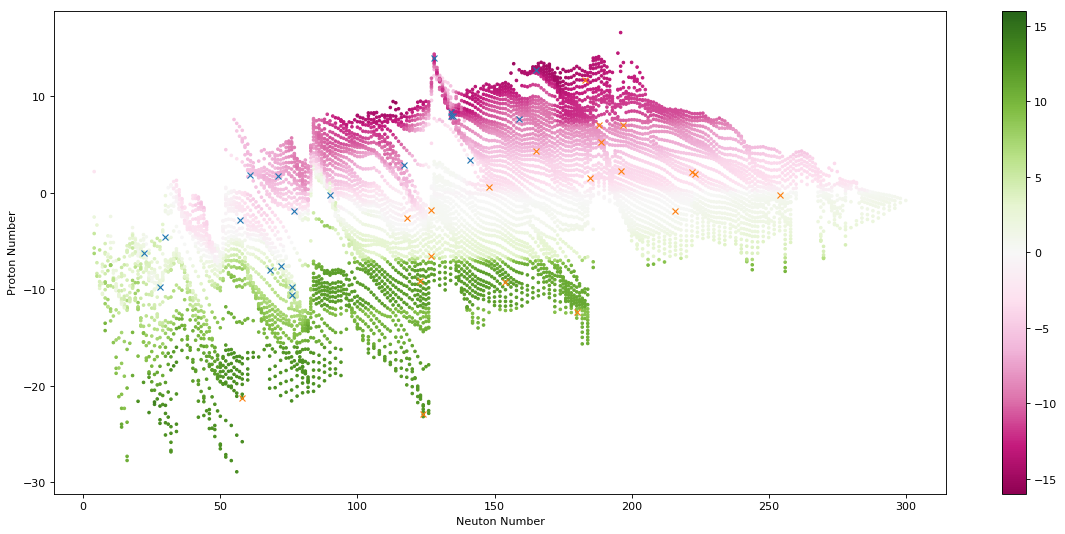

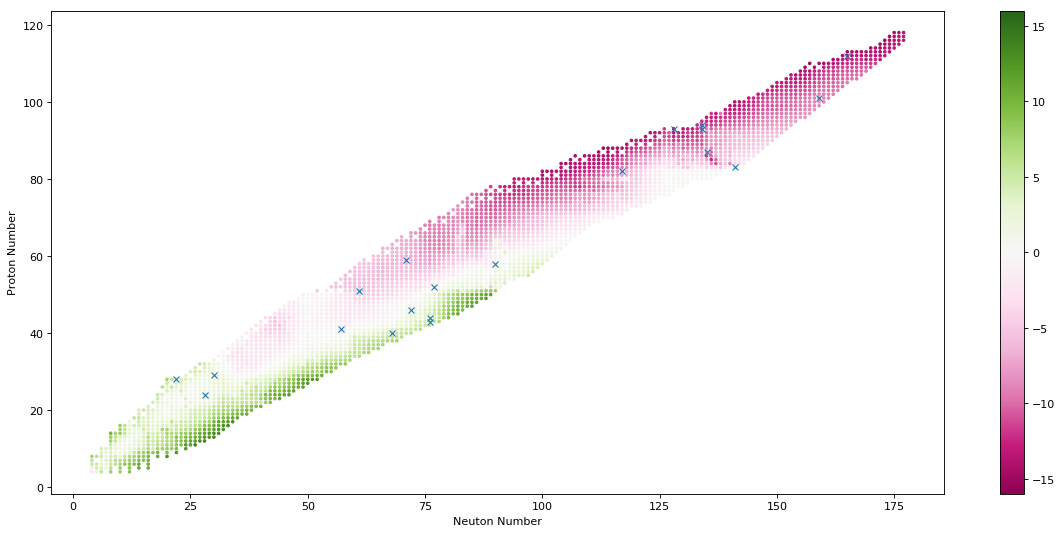

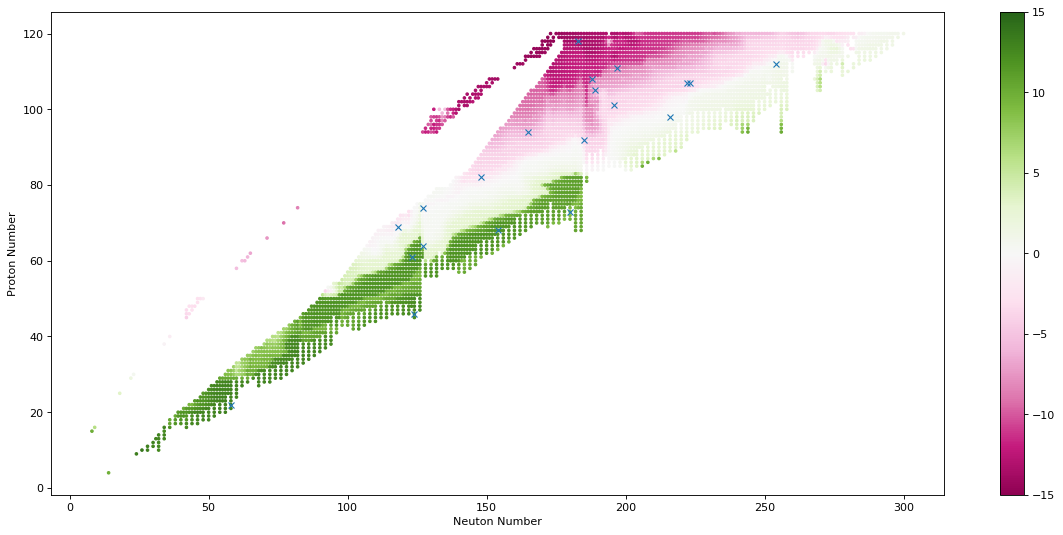

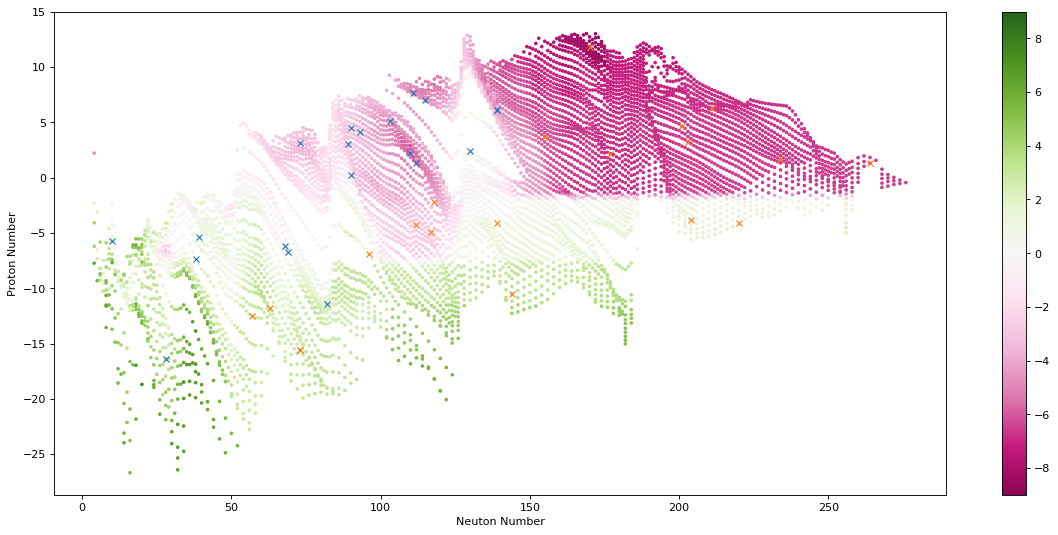

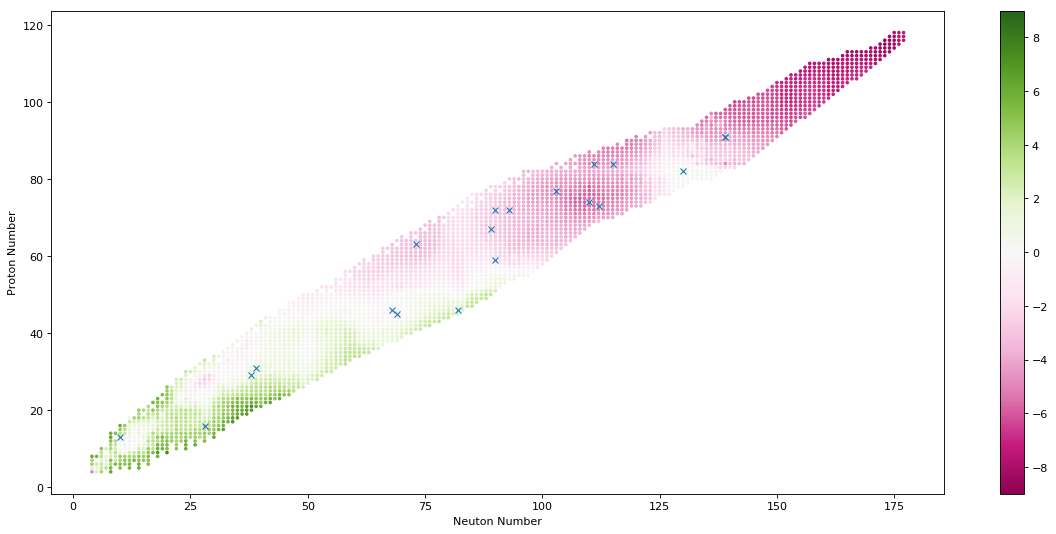

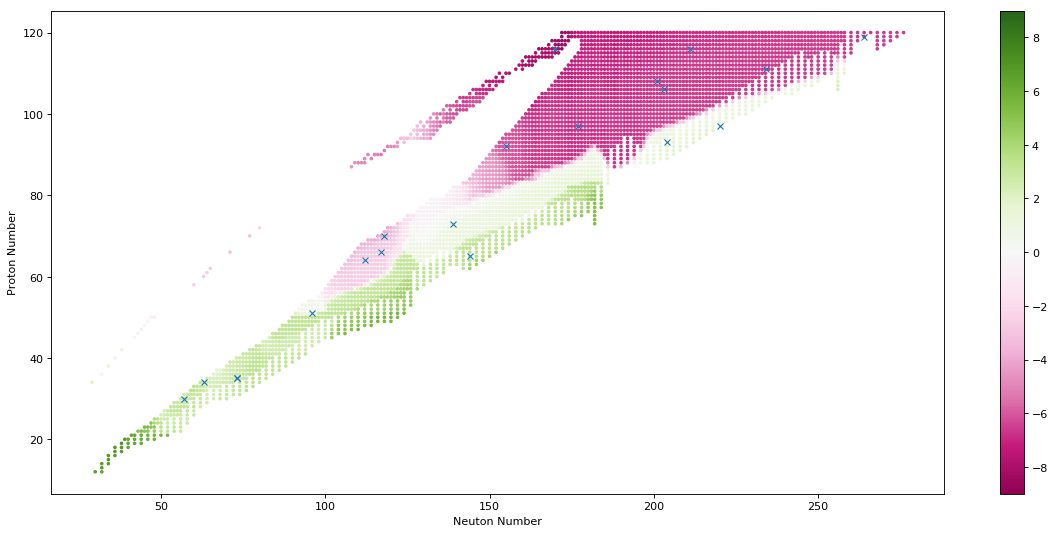

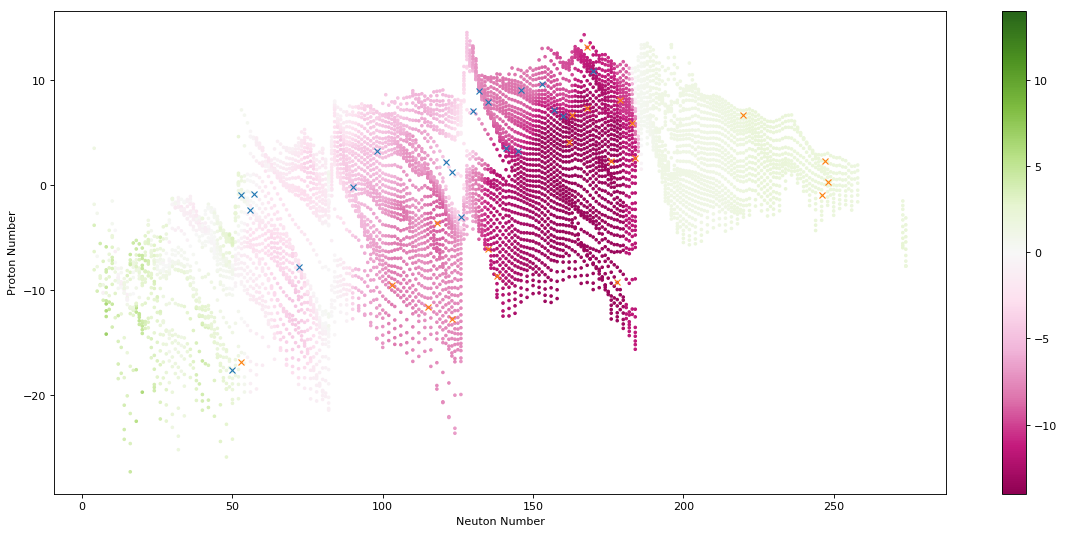

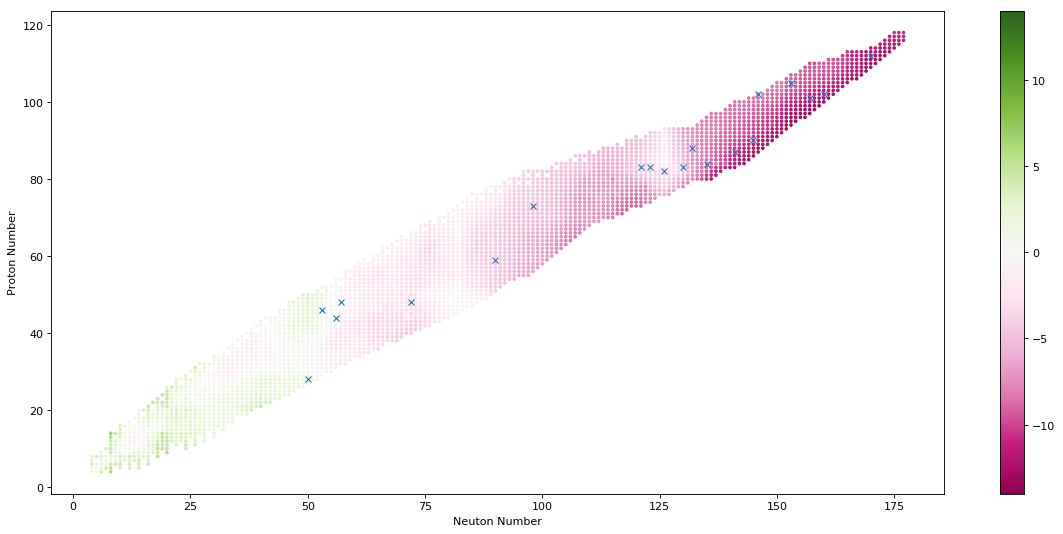

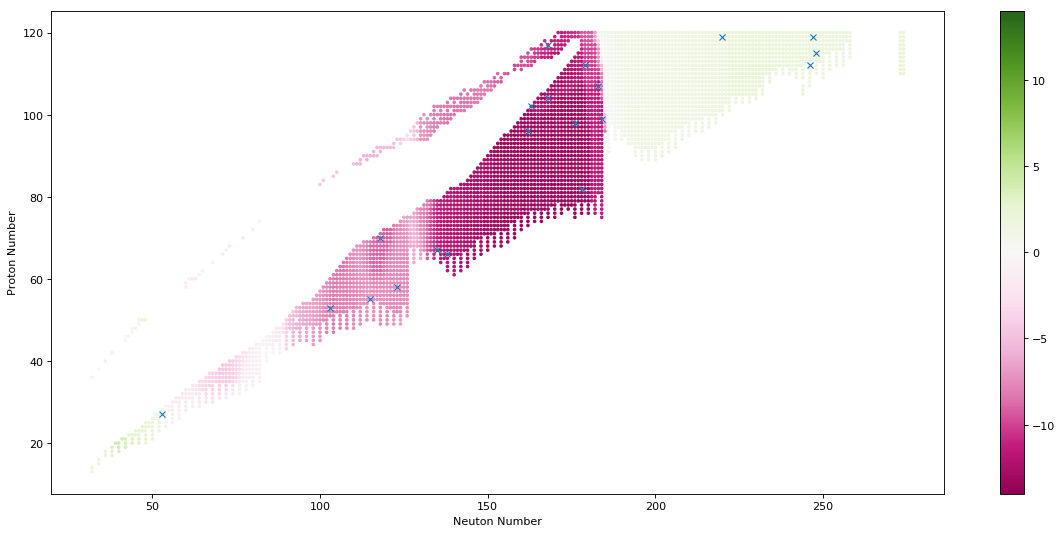

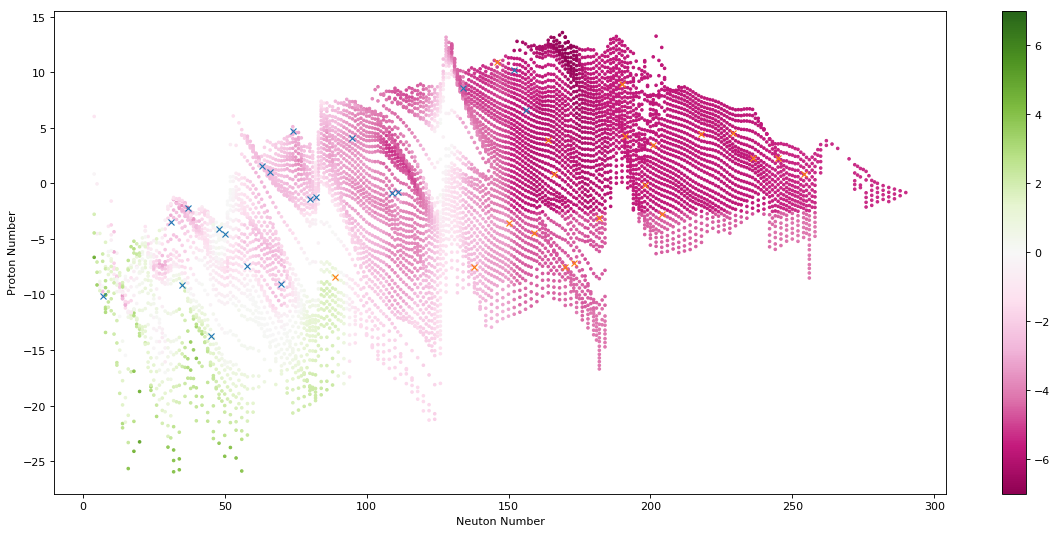

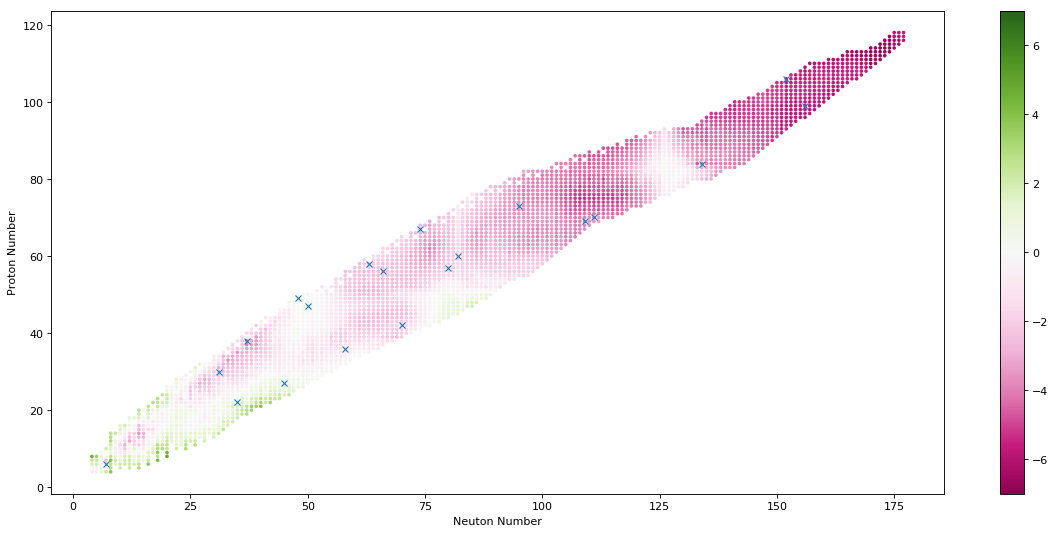

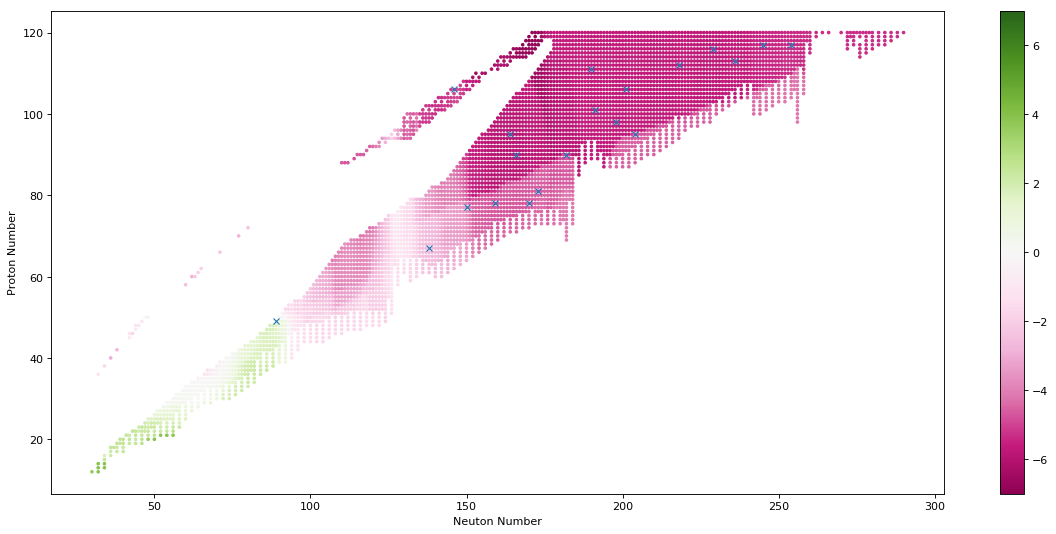

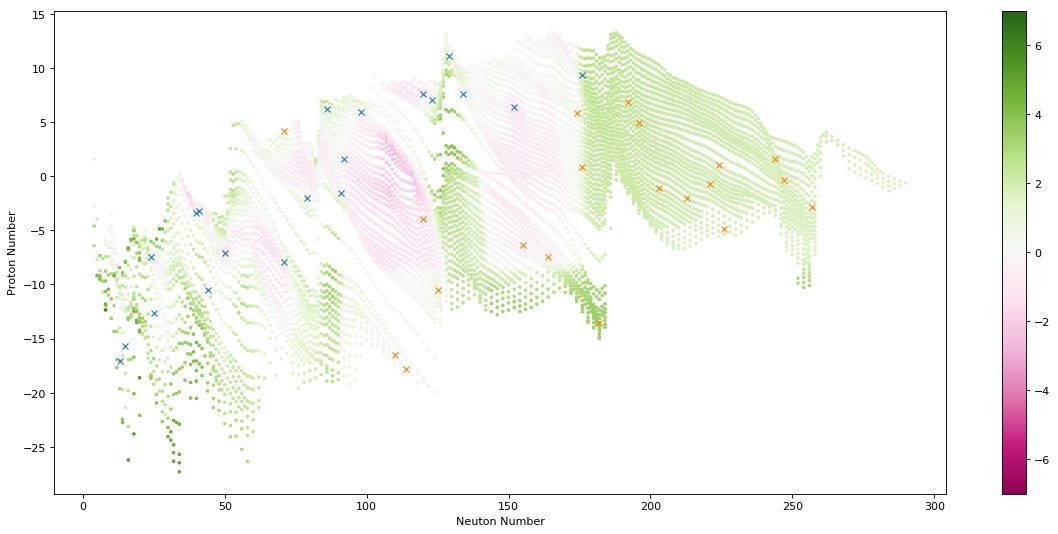

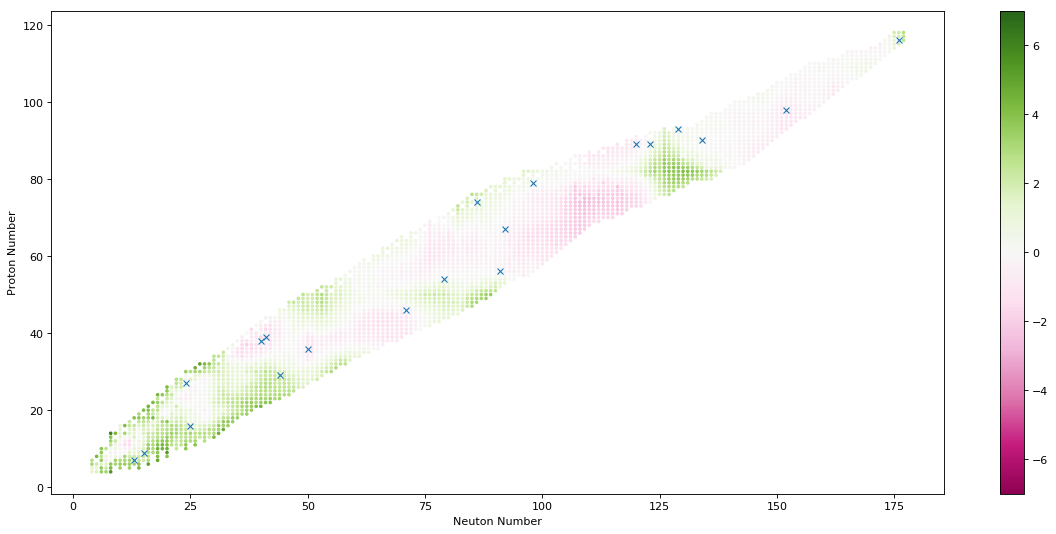

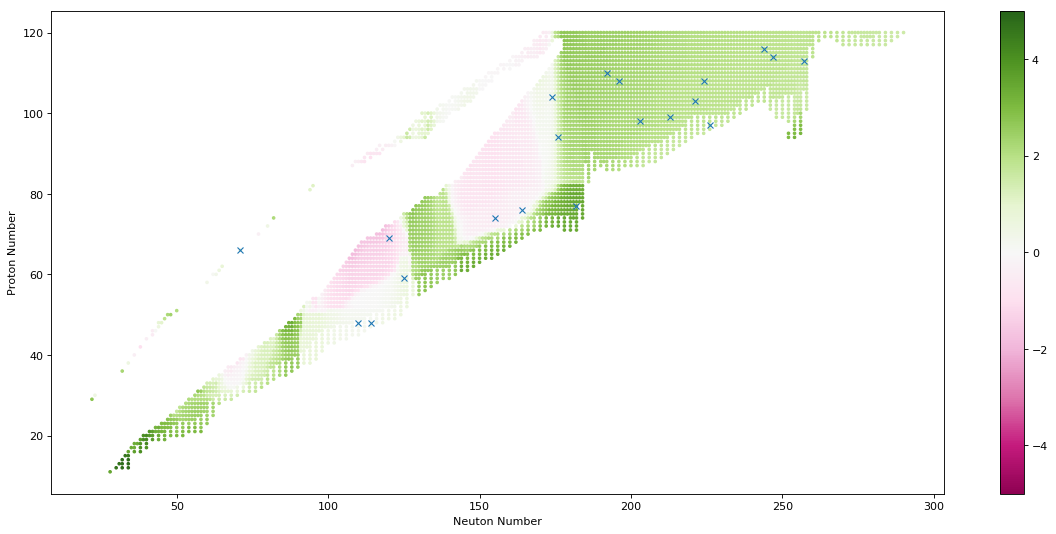

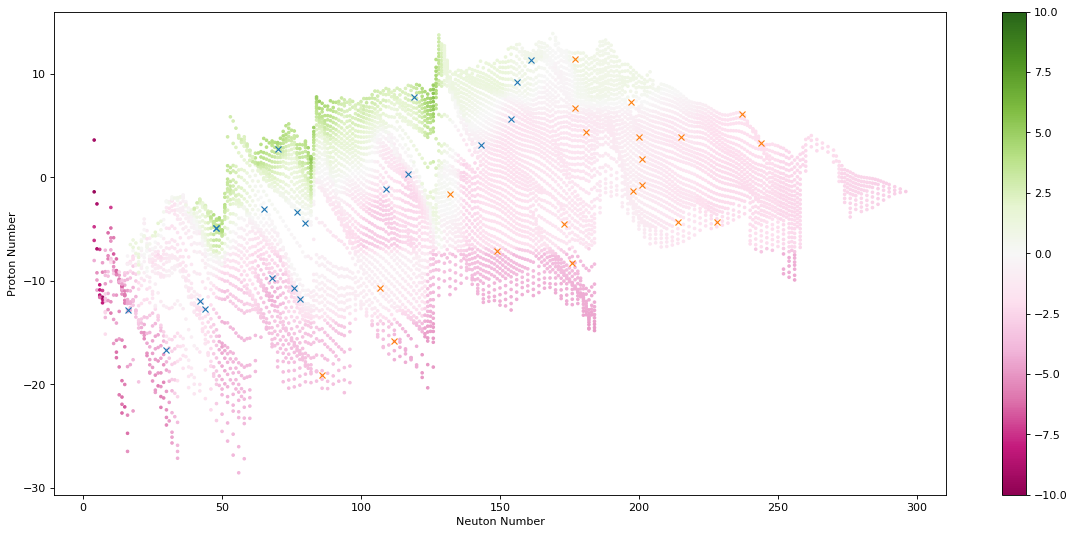

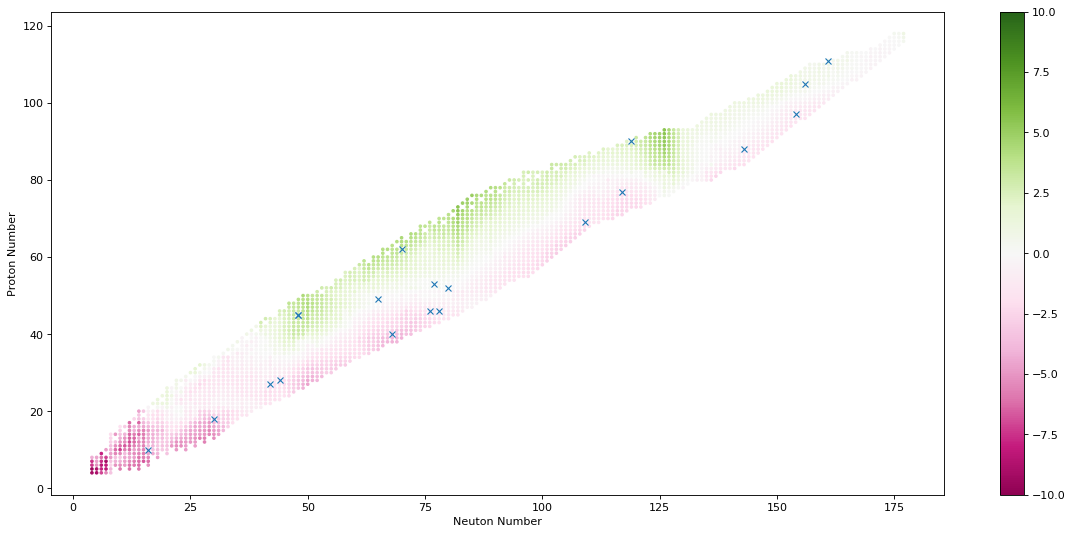

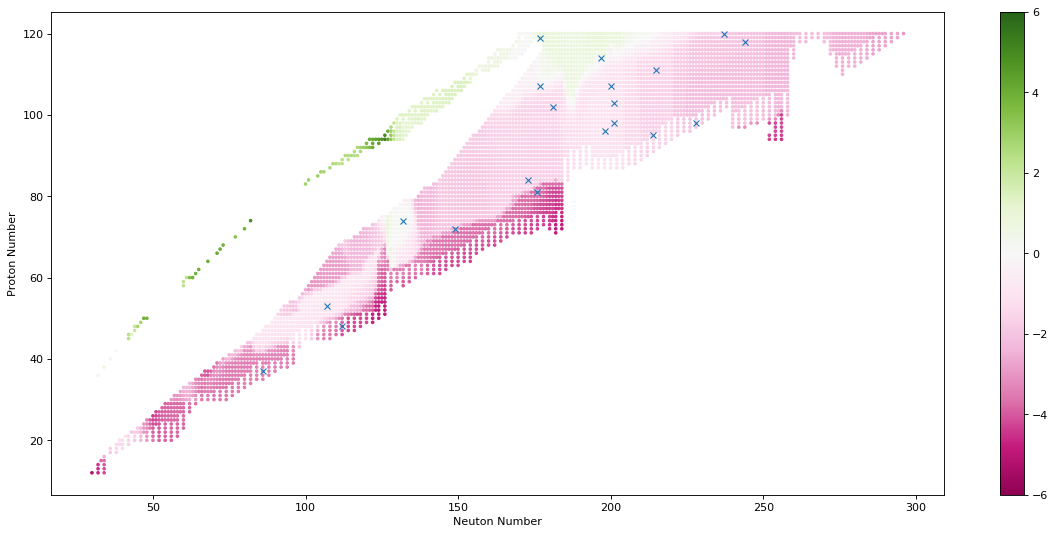

In [16]:
for i in range(0,6):
    ext = np.int(np.ceil(max(-np.min(pred_all[i]),np.max(pred_all[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(the_energies[i])[0],np.transpose(the_energies[i])[3],c=(pred_all[i]),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.plot(np.transpose(in_refs[i])[0],np.transpose(in_refs[i])[5],"x")
    plt.plot(np.transpose(out_refs[i])[0],np.transpose(out_refs[i])[3],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(pred_in[i]),np.max(pred_in[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(train_test_NZ[i])[0],np.transpose(train_test_NZ[i])[1],c=(pred_in[i]),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.plot(np.transpose(in_refs[i])[0],np.transpose(in_refs[i])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    
    ext = np.int(np.ceil(max(-np.min(pred_out[i]),np.max(pred_out[i]))))
    fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
    sc = plt.scatter(np.transpose(out_NZ[i])[0],np.transpose(out_NZ[i])[1],c=(pred_out[i]),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
    plt.plot(np.transpose(out_refs[i])[0],np.transpose(out_refs[i])[1],"x")
    plt.xlabel('Neuton Number')
    plt.ylabel('Proton Number')
    plt.colorbar(sc)
    #plt.plot(np.transpose(the_no_mat_energies[i])[0],np.transpose(the_no_mat_energies[i])[1], "x")
    plt.show()
    

train score:   0.9934235276392759
test score:    0.9547054145392917
mse:  0.2916675911648652 

In [12]:
rf_object.feature_importances_

array([0.00348022, 0.50153164, 0.02430017, 0.00466874, 0.00557687,
       0.00450564, 0.00370933, 0.00727899, 0.00481675, 0.00362641,
       0.0039435 , 0.01451096, 0.00323355, 0.00407252, 0.02490536,
       0.00492575, 0.00409706, 0.04365344, 0.00983819, 0.0129362 ,
       0.00341516, 0.00729585, 0.0035136 , 0.00298945, 0.09066399,
       0.00245821, 0.00732438, 0.00363138, 0.07879518, 0.00316602,
       0.00456127, 0.00343561, 0.00410738, 0.00470147, 0.00660606,
       0.05633301, 0.00886689, 0.00380498, 0.00373169, 0.00358818,
       0.00459046, 0.00280851])